## Objective of this project:
- To analyze the distribution of hospitals by geographycal regions such as city, county and post code
- To Use Latitude and Longitude to map the organizations and identify spatial patterns or clusters.
- To Access regional concentration and coverage by different Organisation Types and Sectors.
- To Visualize and analyze the network of organizations and their parent-child connections.
- To Examine the distribution and concentration of organizations across different Sectors.
- To Analyze the variation within Organisation Types and Sub Types to identify prevalent categories.
- To Evaluate the proportion and characteristics of organizations managed by PIMS (IsPimsManaged).
- To Access the current operational status (OrganisationStatus) of organizations to identify active versus inactive entities.
- To Access how accessible organizations are based on the completeness of their contact information.

In [6]:
pip install pandas networkx pyvis

Note: you may need to restart the kernel to use updated packages.


In [124]:
pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN
import networkx as nx
from pyvis.network import Network

In [7]:
hospital_df = pd.read_csv('Hospital.csv', encoding= 'utf-8')

In [8]:
#rename column name
hospital_df.rename(columns = {'Fax,,,': 'Fax'}, inplace = True)

In [9]:
hospital_df.head(5)

OrganisationID OrganisationCode OrganisationType   SubType  \
0           17970            NDA07         Hospital  Hospital   
1           17981            NDA18         Hospital  Hospital   
2           18102            NLT02         Hospital  Hospital   
3           18138            NMP01         Hospital  Hospital   
4           18142            NMV01         Hospital  Hospital   

               Sector OrganisationStatus  IsPimsManaged  \
0  Independent Sector            Visible           True   
1  Independent Sector            Visible           True   
2          NHS Sector            Visible           True   
3  Independent Sector            Visible          False   
4  Independent Sector            Visible           True   

                                    OrganisationName  \
0  Walton Community Hospital - Virgin Care Servic...   
1            Woking Community Hospital (Virgin Care)   
2                  North Somerset Community Hospital   
3                               Bridgewater Hospital   
4                                   Kneesworth House   

                            Address1        Address2  ...              County  \
0                                NaN     Rodney Road  ...              Surrey   
1                                NaN  Heathside Road  ...              Surrey   
2  North Somerset Community Hospital      Old Street  ...                Avon   
3                  120 Princess Road             NaN  ...  Greater Manchester   
4                     Old North Road    Bassingbourn  ...                 NaN   

   Postcode   Latitude Longitude  ParentODSCode  \
0  KT12 3LD  51.379997 -0.406042            NDA   
1  GU22 7HS  51.315132 -0.556289            NDA   
2  BS21 6BS  51.437195 -2.847193            NLT   
3   M15 5AT  53.459743 -2.245469            NMP   
4   SG8 5JP  52.078121 -0.030604            NMV   

                                          ParentName          Phone  \
0                           Virgin Care Services Ltd   01932 414205   
1                           Virgin Care Services Ltd   01483 715911   
2  North Somerset Community Partnership Community...   01275 872212   
3              Bridgewater Hospital (Manchester) Ltd   0161 2270000   
4                           Partnerships In Care Ltd  01763 255 700   

                                               Email  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  reception_kneesworthhouse@partnershipsincare.c...   

                        Website              Fax  
0                           NaN  01932 253674,,,  
1                           NaN              ,,,  
2   http://www.nscphealth.co.uk              ,,,  
3   www.bridgewaterhospital.com              ,,,  
4  www.partnershipsincare.co.uk              ,,,  

[5 rows x 22 columns]

In [10]:
hospital_df.set_index('OrganisationID', inplace = True)

In [13]:
hospital_df.head(3)

OrganisationCode OrganisationType   SubType  \
OrganisationID                                               
17970                     NDA07         Hospital  Hospital   
17981                     NDA18         Hospital  Hospital   
18102                     NLT02         Hospital  Hospital   

                            Sector OrganisationStatus  IsPimsManaged  \
OrganisationID                                                         
17970           Independent Sector            Visible           True   
17981           Independent Sector            Visible           True   
18102                   NHS Sector            Visible           True   

                                                 OrganisationName  \
OrganisationID                                                      
17970           Walton Community Hospital - Virgin Care Servic...   
17981                     Woking Community Hospital (Virgin Care)   
18102                           North Somerset Community Hospital   

                                         Address1        Address2 Address3  \
OrganisationID                                                               
17970                                         NaN     Rodney Road      NaN   
17981                                         NaN  Heathside Road      NaN   
18102           North Somerset Community Hospital      Old Street      NaN   

                ...  County  Postcode   Latitude  Longitude  ParentODSCode  \
OrganisationID  ...                                                          
17970           ...  Surrey  KT12 3LD  51.379997  -0.406042            NDA   
17981           ...  Surrey  GU22 7HS  51.315132  -0.556289            NDA   
18102           ...    Avon  BS21 6BS  51.437195  -2.847193            NLT   

                                                       ParentName  \
OrganisationID                                                      
17970                                    Virgin Care Services Ltd   
17981                                    Virgin Care Services Ltd   
18102           North Somerset Community Partnership Community...   

                       Phone Email                      Website  \
OrganisationID                                                    
17970           01932 414205   NaN                          NaN   
17981           01483 715911   NaN                          NaN   
18102           01275 872212   NaN  http://www.nscphealth.co.uk   

                            Fax  
OrganisationID                   
17970           01932 253674,,,  
17981                       ,,,  
18102                       ,,,  

[3 rows x 21 columns]

In [19]:
hospital_df.columns

Index(['OrganisationCode', 'OrganisationType', 'SubType', 'Sector',
       'OrganisationStatus', 'IsPimsManaged', 'OrganisationName', 'Address1',
       'Address2', 'Address3', 'City', 'County', 'Postcode', 'Latitude',
       'Longitude', 'ParentODSCode', 'ParentName', 'Phone', 'Email', 'Website',
       'Fax'],
      dtype='object')

In [21]:
hospital_df.shape

(1211, 21)

## Handling missing values

In [24]:
#check for missing values
hospital_df.isnull().sum()

OrganisationCode         0
OrganisationType         0
SubType                  0
Sector                   0
OrganisationStatus       0
IsPimsManaged            0
OrganisationName         0
Address1               328
Address2               484
Address3              1064
City                    15
County                 238
Postcode                 1
Latitude                 2
Longitude                2
ParentODSCode            0
ParentName               0
Phone                  250
Email                  789
Website                358
Fax                      2
dtype: int64

In [26]:
missing_values = hospital_df.isnull().sum()

In [28]:
#check percentage of missing values
missing_percentage = (missing_values/len(hospital_df)) * 100
missing_percentage

OrganisationCode       0.000000
OrganisationType       0.000000
SubType                0.000000
Sector                 0.000000
OrganisationStatus     0.000000
IsPimsManaged          0.000000
OrganisationName       0.000000
Address1              27.085054
Address2              39.966969
Address3              87.861272
City                   1.238646
County                19.653179
Postcode               0.082576
Latitude               0.165153
Longitude              0.165153
ParentODSCode          0.000000
ParentName             0.000000
Phone                 20.644096
Email                 65.152766
Website               29.562345
Fax                    0.165153
dtype: float64

In [30]:
#Drop Columns with missing values
treated_values = hospital_df.drop(hospital_df.columns[hospital_df.isnull().mean() > 0.30], axis = 1)

In [32]:
#check count of remaining columns with null values
treated_values.isnull().sum()

OrganisationCode        0
OrganisationType        0
SubType                 0
Sector                  0
OrganisationStatus      0
IsPimsManaged           0
OrganisationName        0
Address1              328
City                   15
County                238
Postcode                1
Latitude                2
Longitude               2
ParentODSCode           0
ParentName              0
Phone                 250
Website               358
Fax                     2
dtype: int64

In [210]:
#fill null values with missing object datatype
hospitalNew_df = hospitaltreat_df.fillna('missing')

In [212]:
#check new dataset for null values
hospitalNew_df.isnull().sum()

OrganisationCode      0
OrganisationType      0
SubType               0
Sector                0
OrganisationStatus    0
IsPimsManaged         0
OrganisationName      0
Address1              0
City                  0
County                0
Postcode              0
Latitude              0
Longitude             0
ParentODSCode         0
ParentName            0
Phone                 0
Website               0
Fax                   0
dtype: int64

In [214]:
#check for duplicate values
hospitalNew_df.duplicated()

OrganisationID
17970       False
17981       False
18102       False
18138       False
18142       False
            ...  
10956142    False
10956143    False
10956150    False
10956151    False
10956153    False
Length: 1211, dtype: bool

## Explorative Data Analysis

In [217]:
#check datatypes
hospitalNew_df.dtypes

OrganisationCode       object
OrganisationType       object
SubType                object
Sector                 object
OrganisationStatus     object
IsPimsManaged            bool
OrganisationName       object
Address1               object
City                   object
County                 object
Postcode               object
Latitude              float64
Longitude             float64
ParentODSCode          object
ParentName             object
Phone                  object
Website                object
Fax                    object
dtype: object

In [219]:
#check the data frame information
hospitalNew_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 17970 to 10956153
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrganisationCode    1211 non-null   object 
 1   OrganisationType    1211 non-null   object 
 2   SubType             1211 non-null   object 
 3   Sector              1211 non-null   object 
 4   OrganisationStatus  1211 non-null   object 
 5   IsPimsManaged       1211 non-null   bool   
 6   OrganisationName    1211 non-null   object 
 7   Address1            1211 non-null   object 
 8   City                1211 non-null   object 
 9   County              1211 non-null   object 
 10  Postcode            1211 non-null   object 
 11  Latitude            1211 non-null   float64
 12  Longitude           1211 non-null   float64
 13  ParentODSCode       1211 non-null   object 
 14  ParentName          1211 non-null   object 
 15  Phone               1211 non-null   object 
 16  Web

### We analyze the distribution of hospitals by geographycal regions such as city, county and post code

In [222]:
# Filter out the data for hospitals only
hospitalMain_df = hospitalNew_df[hospitalNew_df['OrganisationType'] == 'Hospital']

In [224]:
# Convert Latitude and Longitude to numeric, forcing errors to NaN
hospitalMain_df['Latitude'] = pd.to_numeric(hospitalMain_df['Latitude'], errors='coerce')
hospitalMain_df['Longitude'] = pd.to_numeric(hospitalMain_df['Longitude'], errors='coerce')

In [226]:
# Drop rows with missing or invalid Latitude and Longitude
hospitalMain_df = hospitalMain_df.dropna(subset=['Latitude', 'Longitude'])

In [228]:
# Initialize a map centered around a specific location (e.g., the center of the country)
m = folium.Map(location=[51.509865, -0.118092], zoom_start=6)

In [230]:
# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

In [232]:
# Function to add markers to the map
def add_markers(data):
    for _, row in data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['OrganisationName']}<br>City: {row['City']}<br>County: {row['County']}<br>Postcode: {row['Postcode']}",
            icon=folium.Icon(icon='hospital-o', prefix='fa')
        ).add_to(marker_cluster)

In [234]:
# Add markers to the map for each hospital
add_markers(hospitalMain_df)

In [236]:
# Save the map to an HTML file
m.save('hospital_distribution_map.html')

In [237]:
# Display the map (optional in a Jupyter Notebook environment)
m

#### The above map is an interactive map displaying the distribution of hospitals across different geographical regions, which can be opened in a web browser. From the map we can see the spread of the hospitals in different regions, we can also identify how many hospitals we have in total for each region, if you try to zoom in you will be able to see the number of hospitals by city, county and post code

## We will be using Latitude and Longitude to map the organizations and identify spatial patterns or clusters.

In [241]:
# Extract the relevant columns for clustering
coords = hospitalMain_df[['Latitude', 'Longitude']].values

In [243]:
# Perform DBSCAN clustering
db = DBSCAN(eps=0.1, min_samples=5).fit(coords)
labels = db.labels_

In [245]:
# Add cluster labels to the DataFrame
hospitalMain_df['Cluster'] = labels

In [247]:
# Initialize a map centered around a specific location (e.g., the center of the country)
m = folium.Map(location=[51.509865, -0.118092], zoom_start=6)

In [249]:
# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

In [251]:
# Define colors for clusters
colors = [
    'red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
    'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 
    'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray'
]

In [253]:
# Function to add markers to the map
def add_markers(data):
    for _, row in data.iterrows():
        cluster_color = colors[row['Cluster'] % len(colors)] if row['Cluster'] != -1 else 'gray'
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=(
                f"Name: {row['OrganisationName']}<br>"
                f"Type: {row['OrganisationType']}<br>"
                f"Sub Type: {row['SubType']}<br>"
                f"Sector: {row['Sector']}<br>"
                f"Status: {row['OrganisationStatus']}<br>"
                f"City: {row['City']}<br>"
                f"County: {row['County']}<br>"
                f"Postcode: {row['Postcode']}<br>"
                f"Parent: {row['ParentName']}<br>"
                f"Phone: {row['Phone']}<br>"
                f"Website: {row['Website']}<br>"
                f"Fax: {row['Fax']}"
            ),
            icon=folium.Icon(color=cluster_color)
        ).add_to(marker_cluster)

In [255]:
# Add markers to the map for each organization
add_markers(hospitalMain_df)

# Save the map to an HTML file
m.save('organization_clusters_map.html')

# Display the map (optional in a Jupyter Notebook environment)
m

#### The interactive map shows the spatial clusters of organizations, the distance between one clusters to the other, this makes it easier to identify patterns and relationships between various hospitals.

## Identify regional concentration and coverage by different Organisation Types and Sectors.

In [258]:
# Group by City, County, Organisation Type, and Sector
grouped = hospitalMain_df.groupby(['City', 'County', 'OrganisationType', 'Sector']).size().reset_index(name='Count')

In [260]:
# Initialize a map centered around a specific location (e.g., the center of the country)
m = folium.Map(location=[51.509865, -0.118092], zoom_start=6)

In [262]:
# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

In [264]:
# Define colors for clusters
colors = [
    'red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
    'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 
    'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray'
]


In [266]:
# Function to add markers to the map
def add_markers(data):
    for _, row in data.iterrows():
        cluster_color = colors[row['Cluster'] % len(colors)] if row['Cluster'] != -1 else 'gray'
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=(
                f"Name: {row['OrganisationName']}<br>"
                f"Type: {row['OrganisationType']}<br>"
                f"Sub Type: {row['SubType']}<br>"
                f"Sector: {row['Sector']}<br>"
                f"Status: {row['OrganisationStatus']}<br>"
                f"City: {row['City']}<br>"
                f"County: {row['County']}<br>"
                f"Postcode: {row['Postcode']}<br>"
                f"Parent: {row['ParentName']}<br>"
                f"Phone: {row['Phone']}<br>"
                f"Website: {row['Website']}<br>"
                f"Fax: {row['Fax']}<br>"
                f"Cluster: {row['Cluster']}"
            ),
            icon=folium.Icon(color=cluster_color)
        ).add_to(marker_cluster)

In [268]:
# Add markers to the map for each organization
add_markers(hospitalMain_df)

In [270]:
# Save the map to an HTML file
m.save('organization_clusters_map.html')

In [271]:
# Display the map (optional in a Jupyter Notebook environment)
m

#### The above interactive map shows the spatial clusters of organizations, and it will also output a summary of the regional concentration and coverage by different Organisation Types and Sectors.

In [274]:
# Print the grouped data to identify regional concentration and coverage
print(grouped)

                   City           County OrganisationType              Sector  \
0    101 Manthorpe Road     Lincolnshire         Hospital          NHS Sector   
1        Abbots Langley    Hertfordshire         Hospital  Independent Sector   
2              Abingdon      Oxfordshire         Hospital  Independent Sector   
3            Accrington       Lancashire         Hospital          NHS Sector   
4               Alnwick   Northumberland         Hospital          NHS Sector   
..                  ...              ...              ...                 ...   
775              Yeovil         Somerset         Hospital          NHS Sector   
776                York    County Durham         Hospital  Independent Sector   
777                York  North Yorkshire         Hospital  Independent Sector   
778                York  North Yorkshire         Hospital          NHS Sector   
779                York           Surrey         Hospital          NHS Sector   

     Count  
0        1  
1

## Examine the distribution and concentration of organizations across different Sectors.

In [367]:
# Clean the data: Ensure relevant columns are treated as strings
hospitalMain_df['Sector'] = hospitalMain_df['Sector'].astype(str)

In [369]:
# Analyze the distribution by grouping by Sector
sector_distribution = hospitalMain_df['Sector'].value_counts().reset_index()
sector_distribution.columns = ['Sector', 'Count']

In [371]:
# Display the DataFrame for verification
print(sector_distribution)

               Sector  Count
0          NHS Sector    743
1  Independent Sector    468


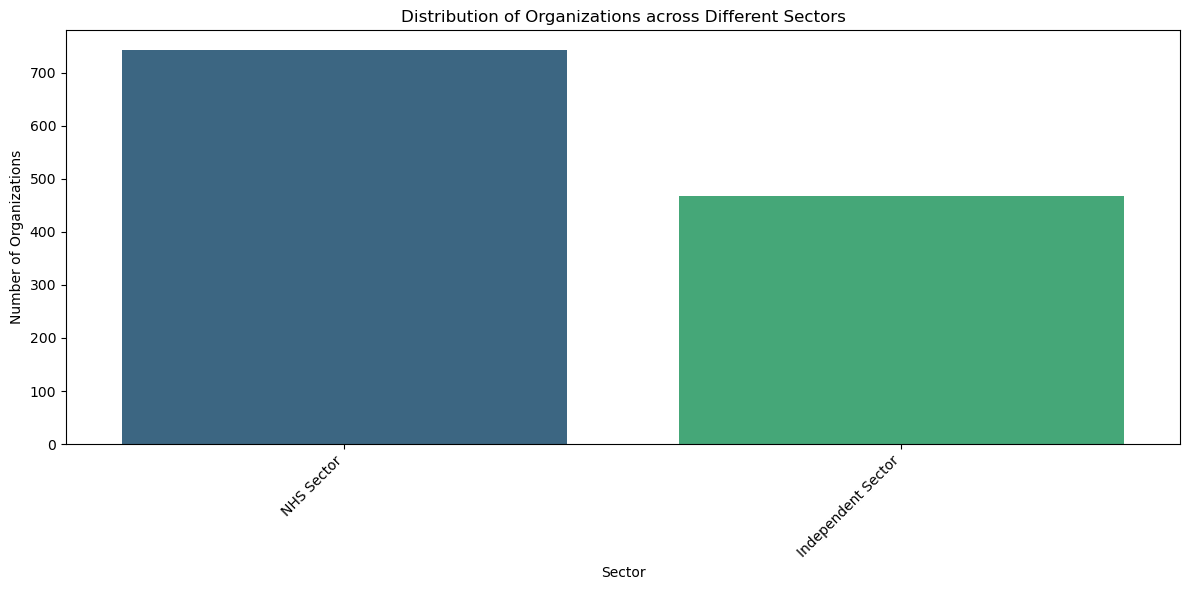

In [303]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_distribution, x='Sector', y='Count', palette='viridis')
plt.title('Distribution of Organizations across Different Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Organizations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

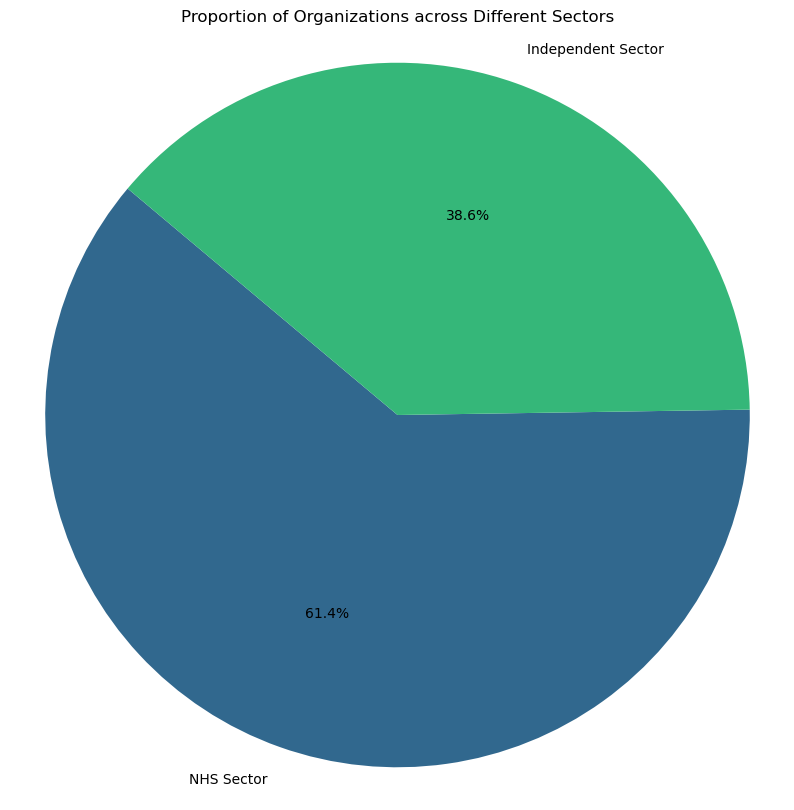

In [305]:
# Pie chart
plt.figure(figsize=(10, 10))
plt.pie(sector_distribution['Count'], labels=sector_distribution['Sector'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(sector_distribution)))
plt.title('Proportion of Organizations across Different Sectors')
plt.axis('equal')
plt.show()

#### The above bar chart and pie chart shows the distribution and concentration of organizations across different sectors by visualizing the data in both a bar plot and a pie chart. The visualizations provide insights into which sectors have the highest and lowest concentrations of organizations. we can see the distribution between the NHS sector and the Independent sector

## Analyze the variation within Organisation Types and Sub Types to identify prevalent categories.

In [309]:
# Ensure relevant columns are strings to avoid any issues
hospitalMain_df['OrganisationType'] = hospitalMain_df['OrganisationType'].astype(str)
hospitalMain_df['SubType'] = hospitalMain_df['SubType'].astype(str)

In [311]:
# Analyze the distribution by grouping by Organisation Type and Sub Type
type_distribution = hospitalMain_df['OrganisationType'].value_counts().reset_index()
type_distribution.columns = ['OrganisationType', 'Count']

In [313]:
subtype_distribution = hospitalMain_df.groupby(['OrganisationType', 'SubType']).size().reset_index(name='Count')

In [315]:
# Display the DataFrames for verification
print("Organisation Type Distribution:\n", type_distribution)
print("\nSub Type Distribution:\n", subtype_distribution)

Organisation Type Distribution:
   OrganisationType  Count
0         Hospital   1211

Sub Type Distribution:
   OrganisationType                 SubType  Count
0         Hospital                Hospital    961
1         Hospital  Mental Health Hospital      6
2         Hospital                 UNKNOWN    244


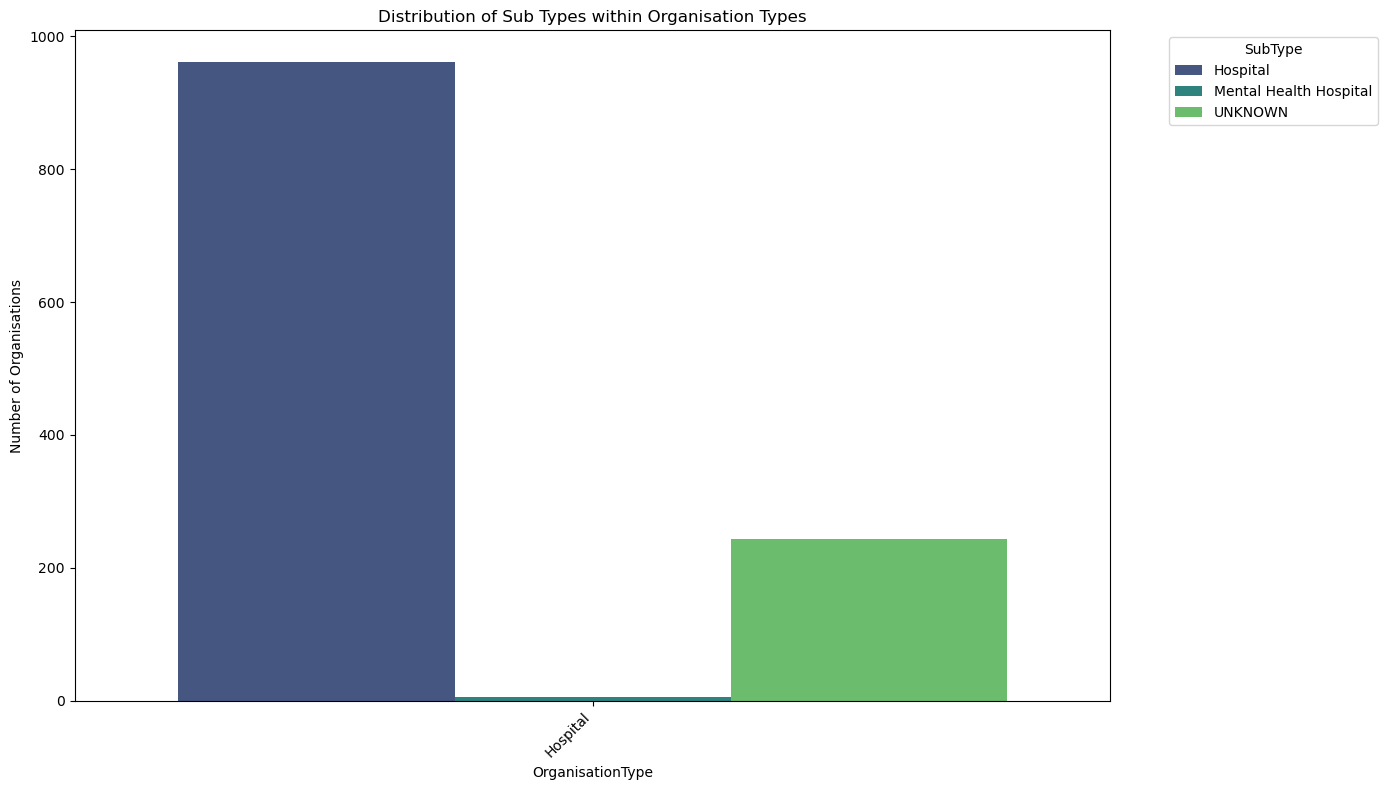

In [317]:
# Bar plot for Sub Types within Organisation Types
plt.figure(figsize=(14, 8))
sns.barplot(data=subtype_distribution, x='OrganisationType', y='Count', hue='SubType', palette='viridis')
plt.title('Distribution of Sub Types within Organisation Types')
plt.xlabel('OrganisationType')
plt.ylabel('Number of Organisations')
plt.xticks(rotation=45, ha='right')
plt.legend(title='SubType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### These visualizations helps us to identify which Organisation Types and Sub Types are most prevalent, providing insights into the variation and distribution within these categories.

## Evaluate the proportion and characteristics of organizations managed by PIMS (IsPimsManaged).

In [321]:
# Ensure relevant columns are strings to avoid any issues
hospitalMain_df['IsPimsManaged'] = hospitalMain_df['IsPimsManaged'].astype(str)

In [323]:
# Analyze the proportion of organizations managed by PIMS
pims_managed_proportion = hospitalMain_df['IsPimsManaged'].value_counts(normalize=True).reset_index()
pims_managed_proportion.columns = ['IsPimsManaged', 'Proportion']

In [325]:
# Display the proportion for verification
print("Proportion of Organizations Managed by PIMS:\n", pims_managed_proportion)

Proportion of Organizations Managed by PIMS:
   IsPimsManaged  Proportion
0          True     0.82659
1         False     0.17341


In [327]:
# Analyze characteristics of organizations managed by PIMS
characteristics_by_pims = hospitalMain_df.groupby('IsPimsManaged').agg({
    'OrganisationType': 'value_counts',
    'Sector': 'value_counts',
    'OrganisationStatus': 'value_counts'
}).reset_index()

In [329]:
# Display the characteristics for verification
print("\nCharacteristics of Organizations Managed by PIMS:\n", characteristics_by_pims)


Characteristics of Organizations Managed by PIMS:
   IsPimsManaged             level_1  OrganisationType  Sector  \
0         False            Hospital             210.0     NaN   
1          True            Hospital            1001.0     NaN   
2         False  Independent Sector               NaN   137.0   
3         False          NHS Sector               NaN    73.0   
4          True          NHS Sector               NaN   670.0   
5          True  Independent Sector               NaN   331.0   
6         False             Visible               NaN     NaN   
7          True             Visible               NaN     NaN   

   OrganisationStatus  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
5                 NaN  
6               210.0  
7              1001.0  


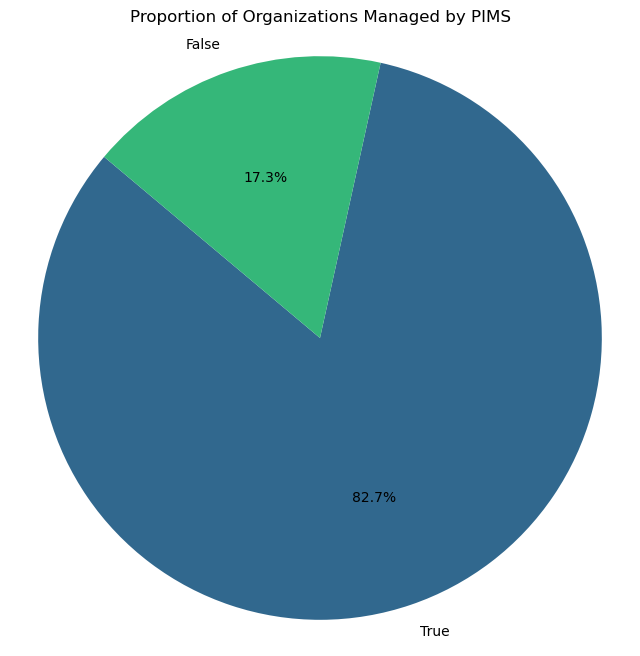

In [331]:
# Pie chart for PIMS management proportion
plt.figure(figsize=(8, 8))
plt.pie(pims_managed_proportion['Proportion'], labels=pims_managed_proportion['IsPimsManaged'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(pims_managed_proportion)))
plt.title('Proportion of Organizations Managed by PIMS')
plt.axis('equal')
plt.show()

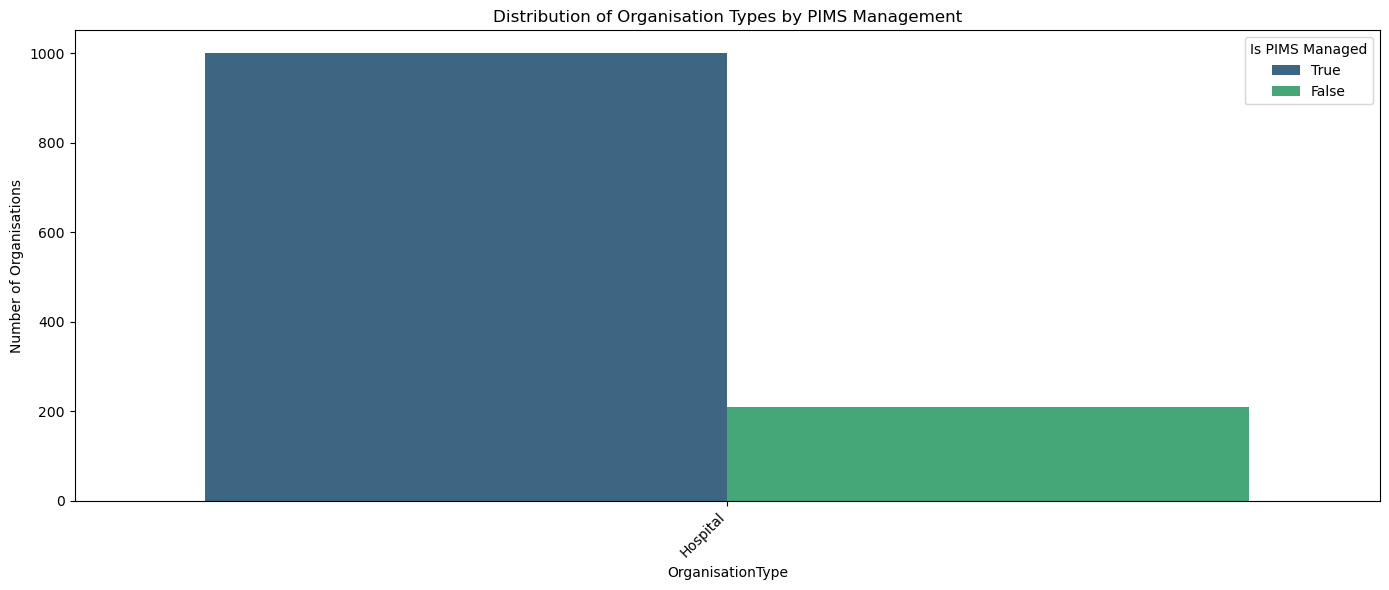

In [333]:
# Organisation Type distribution by PIMS management
plt.figure(figsize=(14, 6))
sns.countplot(data=hospitalMain_df, x='OrganisationType', hue='IsPimsManaged', palette='viridis')
plt.title('Distribution of Organisation Types by PIMS Management')
plt.xlabel('OrganisationType')
plt.ylabel('Number of Organisations')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is PIMS Managed')
plt.tight_layout()
plt.show()

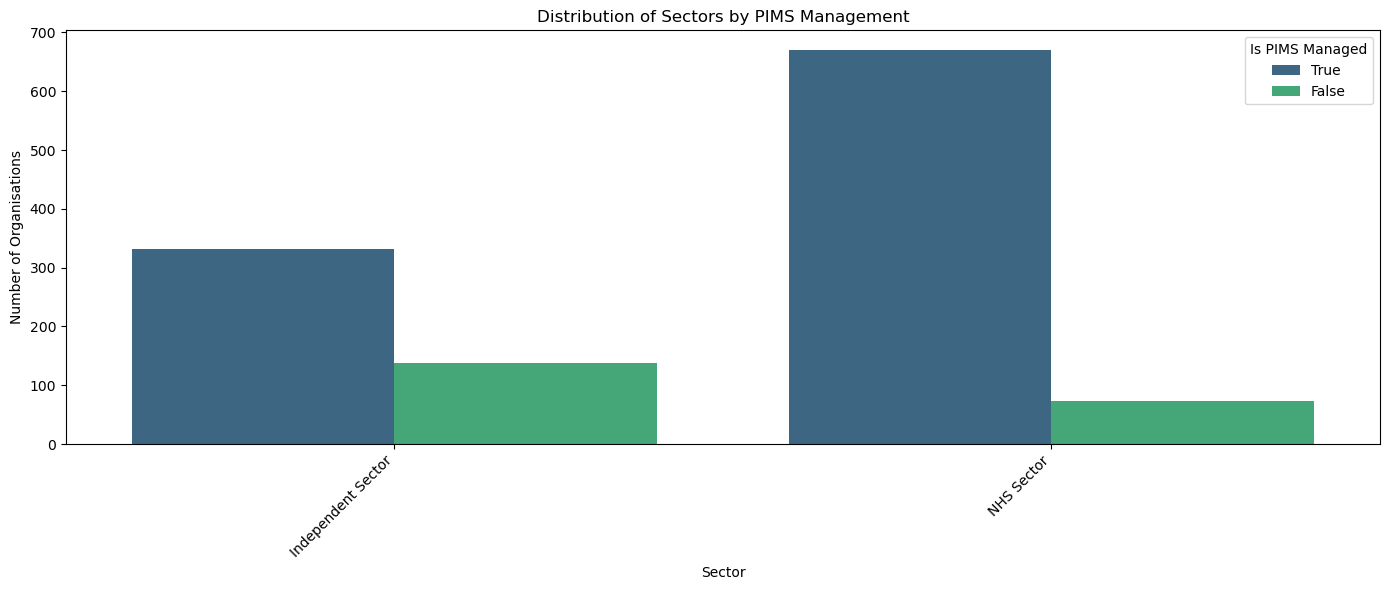

In [335]:
# Sector distribution by PIMS management
plt.figure(figsize=(14, 6))
sns.countplot(data=hospitalMain_df, x='Sector', hue='IsPimsManaged', palette='viridis')
plt.title('Distribution of Sectors by PIMS Management')
plt.xlabel('Sector')
plt.ylabel('Number of Organisations')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is PIMS Managed')
plt.tight_layout()
plt.show()

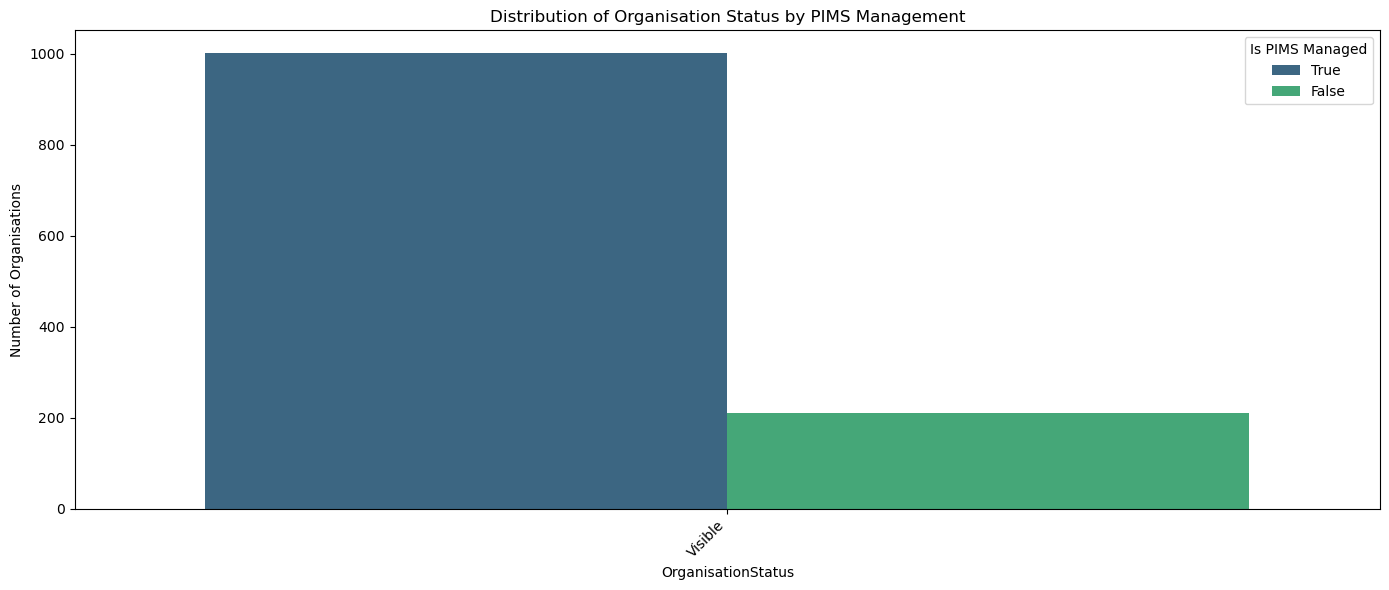

In [337]:
# Organisation Status distribution by PIMS management
plt.figure(figsize=(14, 6))
sns.countplot(data=hospitalMain_df, x='OrganisationStatus', hue='IsPimsManaged', palette='viridis')
plt.title('Distribution of Organisation Status by PIMS Management')
plt.xlabel('OrganisationStatus')
plt.ylabel('Number of Organisations')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is PIMS Managed')
plt.tight_layout()
plt.show()

#### The charts above evaluates the proportion and characteristics of organizations managed by PIMS and it visualize the results effectively, we can see that PIMS manages up to 82.7% of the organizations within the regions

## Identify the current operational status (OrganisationStatus) of organizations to identify active versus inactive entities.

In [341]:
# Ensure relevant columns are strings to avoid any issues
hospitalMain_df['OrganisationStatus'] = hospitalMain_df['OrganisationStatus'].astype(str)

In [343]:
# Analyze the distribution of Organisation Status
status_distribution = hospitalMain_df['OrganisationStatus'].value_counts().reset_index()
status_distribution.columns = ['OrganisationStatus', 'Count']

In [345]:
# Display the status distribution for verification
print("Distribution of Organisation Status:\n", status_distribution)

Distribution of Organisation Status:
   OrganisationStatus  Count
0            Visible   1211


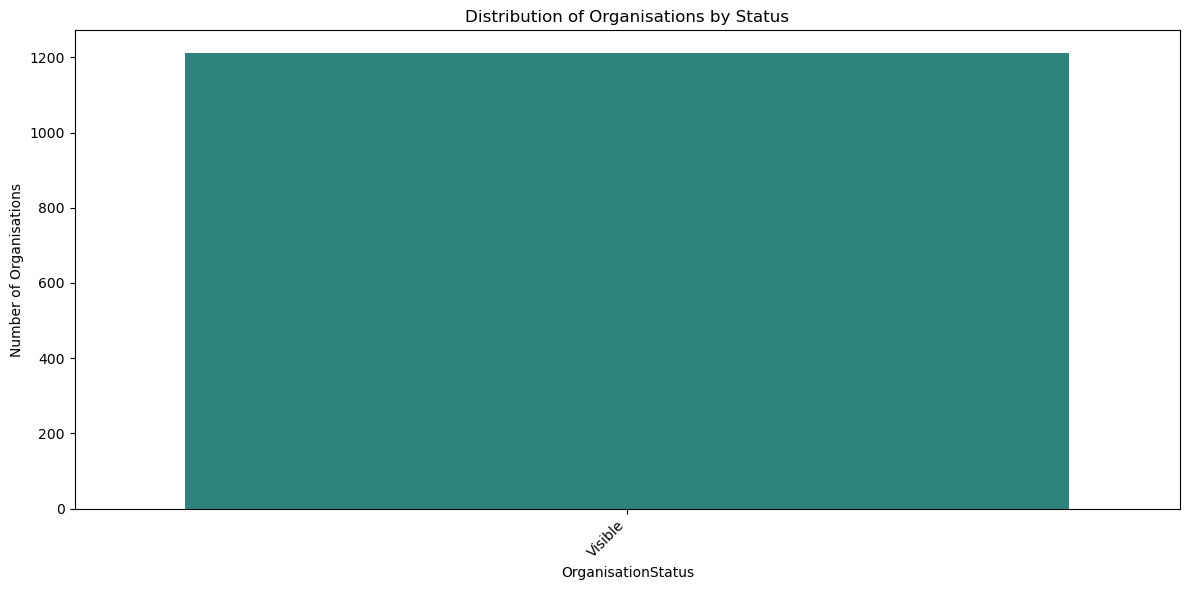

In [347]:
# Bar plot for Organisation Status
plt.figure(figsize=(12, 6))
sns.barplot(data=status_distribution, x='OrganisationStatus', y='Count', palette='viridis')
plt.title('Distribution of Organisations by Status')
plt.xlabel('OrganisationStatus')
plt.ylabel('Number of Organisations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

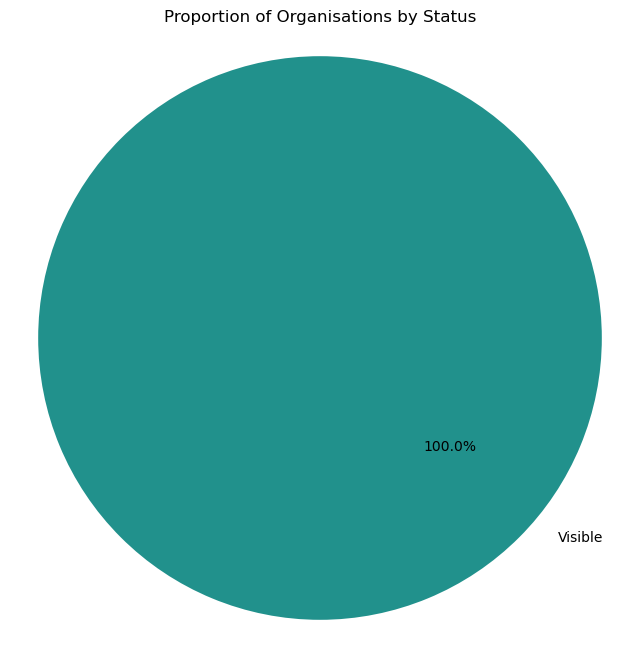

In [349]:
# Pie chart for Organisation Status
plt.figure(figsize=(8, 8))
plt.pie(status_distribution['Count'], labels=status_distribution['OrganisationStatus'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(status_distribution)))
plt.title('Proportion of Organisations by Status')
plt.axis('equal')
plt.show()


In [351]:
# Further analysis: Distinguish between active and inactive entities if specific statuses are known
# Assuming 'Active' and 'Inactive' are the statuses in the dataset
# If different, replace 'Active' and 'Inactive' with actual status labels in the dataset

active_status = ['Active', 'Open', 'Operational']  # Replace with actual labels for active statuses
inactive_status = ['Inactive', 'Closed', 'Non-operational']  # Replace with actual labels for inactive statuses

hospitalMain_df['IsActive'] = hospitalMain_df['OrganisationStatus'].apply(lambda x: 'Active' if x in active_status else 'Inactive' if x in inactive_status else 'Unknown')

In [353]:
# Analyze the active vs inactive distribution
active_inactive_distribution = hospitalMain_df['IsActive'].value_counts().reset_index()
active_inactive_distribution.columns = ['IsActive', 'Count']

In [355]:
# Display the active vs inactive distribution for verification
print("\nActive vs Inactive Distribution:\n", active_inactive_distribution)


Active vs Inactive Distribution:
   IsActive  Count
0  Unknown   1211


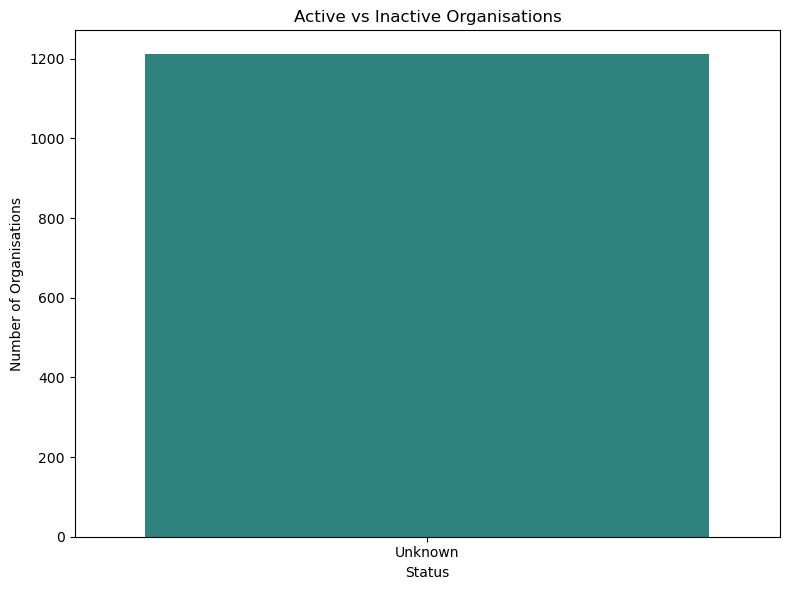

In [357]:
# Bar plot for Active vs Inactive
plt.figure(figsize=(8, 6))
sns.barplot(data=active_inactive_distribution, x='IsActive', y='Count', palette='viridis')
plt.title('Active vs Inactive Organisations')
plt.xlabel('Status')
plt.ylabel('Number of Organisations')
plt.tight_layout()
plt.show()

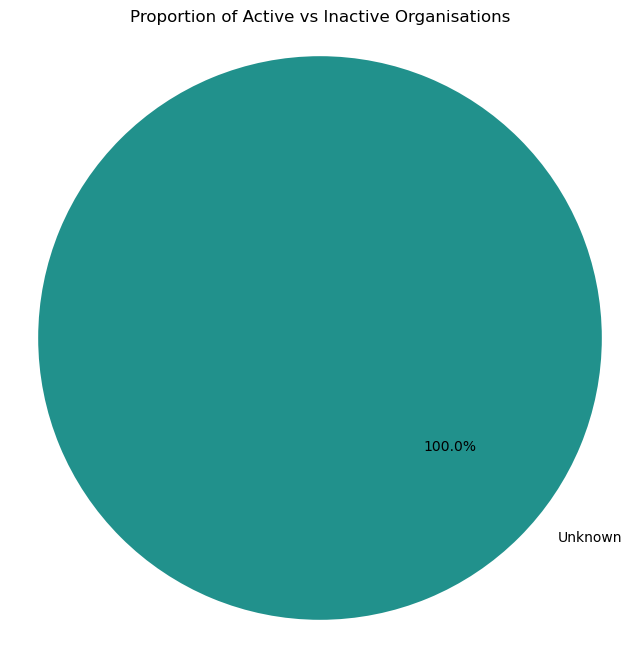

In [359]:
# Pie chart for Active vs Inactive
plt.figure(figsize=(8, 8))
plt.pie(active_inactive_distribution['Count'], labels=active_inactive_distribution['IsActive'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(active_inactive_distribution)))
plt.title('Proportion of Active vs Inactive Organisations')
plt.axis('equal')
plt.show()

#### We can see that the current operational status of organizations from the chart shows that they are all active, this means that all the hospital within the region are operational and are working to optimum capacity. 